# Localizzazione terremoti
In questo file analizzeremo sismogrammi di terremoti che sono stati registrati a stazioni vicine all'evento (terremoti nei primi 10 km di crosta dove Vp in prima approssimazione è costante).

<img src="Fig1.png" alt="Drawing" style="float: right" width="700"><br>

<p style='text-align: justify;'> Mediante la caratterizzazione dei tempi di arrivo delle fasi P ed S andremo a ricostruire il diagramma di Wadati.</p>

<p style='text-align: justify;'>Conoscendo il tempo origine, t<sub>0</sub>, si trasforma il tempo di arrivo in tempo di percorso (traveltime): T<sub>p</sub> = t<sub>p</sub> - t<sub>0</sub>.</p>

<p style='text-align: justify;'>Metodo 1, assumendo Vp costante, p.es. 5.5 km/s per rocce carbonatiche presenti nei primi 8-10 km dello strato sismogenico dell'appennino, la distanza, D, dell'evento dalla stazione la otteniamo tramite: D = Vp * T<sub>p</sub>.</p>

<p style='text-align: justify;'>Metodo 2, assumendo che il mezzo sia Poissoniano ovvero Vp/Vs = $\sqrt{3}$.

<p style='text-align: justify;'> Per effettuare le localizzazioni vedremo anche come passare da lat e lon delle stazioni che registrano l'evento a coordinate UTM.</p>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress
%matplotlib qt

Nella cartella di questa lezione abbiamo i dati registrati a 4 stazioni (GUMA, NRCA, PTQR, TERO) e per ogni stazioni abbiamo i sismogrammi per le tre componenti. Quindi di seguito scriviamo dei comandi per importare i file delle tre componenti di ogni stazione.

In [7]:
import os

path = './'     # './' questo se i files dei sismogrammi sono nella stessa cartella del presente script 
                # altrimenti dovremmo scrivere tutto il path, una cosa tipo '/Users/cristiano/Documents/Python/Elisa/dataloc/'
staz=['NRCA','TERO','PTQR','GUMA']
comp=['.E.asc','.N.asc','.Z.asc']

i=1   # potential values per le stazioni: 0 1 2 3, per le componenti 0, 1, 2
Filee=os.path.join(path,staz[i]+comp[0])
Filen=os.path.join(path,staz[i]+comp[1])
Filez=os.path.join(path,staz[i]+comp[2])
print(Filee)  

#Carica i files con i path assegnati sopra
wE = np.loadtxt(Filee)
wN = np.loadtxt(Filen)
wZ = np.loadtxt(Filez)
#wE.shape

./TERO.E.asc


Ora visualizziamo questi sismogrammi !

In [6]:
%matplotlib qt   
#perchè vogliamo interagire con i plot per definire Tp e Ts
fig, axes = plt.subplots(nrows=3,figsize=(12,12),sharex=True)   #per condividere l'asse x nei 3 subplots
axes[0].plot(wE[:,0],wE[:,1],'r',label='Est component')
axes[0].set_ylabel('Counts')
axes[0].legend(loc='upper right')
axes[1].plot(wN[:,0],wN[:,1],'r',label='North component')
axes[1].set_ylabel('Counts')
axes[1].legend(loc='upper right')
axes[2].plot(wZ[:,0],wZ[:,1],'r',label='Vertical component')
axes[2].set_ylabel('Counts')
axes[2].set_xlabel('Time [s]')
axes[2].legend(loc='upper right')
axes[0].set_xlim([0,150]) # applicato a tutti
axes[0].title.set_text(staz[i])

Facciamo l'array tp e ts-tp 

In [7]:
#stazione NRCA, prende i tempi di arrivo S e P ed S-P
tp_1 = 98.5
ts_1 = 105.3
y1 = ts_1 - tp_1
print(y1)
#stazione TERO
tp_2 = 96.4
ts_2 = 100.7
y2 = ts_2 - tp_2
print(y2)
#stazione PTQR
tp_3 = 98.6
ts_3 = 104.9
y3 = ts_3 - tp_3
print(y3)
#stazione GUMA
tp_4 = 102.9
ts_4 = 113
y4 = ts_4 - tp_4
print(y4)

6.799999999999997
4.299999999999997
6.300000000000011
10.099999999999994


Per visualizzare meglio i dati facciamo un PANDAS dataframe

In [8]:
data = {'Stazioni':['NRCA','TERO',
                    'PTQR','GUMA'],
        'tp':[98.5,96.4,
                 98.6,102.9],
        'ts':[105.3,100.7,
                 104.9,113],
        'ts_tp':[6.8,4.2,6.3,10.1]
       }

df = pd.DataFrame(data)
df

,Stazioni,tp,ts,ts_tp
0,NRCA,98.5,105.3,6.8
1,TERO,96.4,100.7,4.2
2,PTQR,98.6,104.9,6.3
3,GUMA,102.9,113.0,10.1


Text(0.5, 1.0, '"Nostro" diagramma di Wadati ')

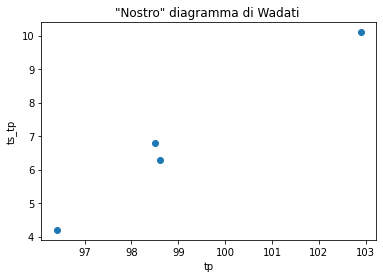

In [9]:
#facciamo l'array tp e ts-tp 
#tp = np.array([tp_1, tp_2,tp_3, tp_4])
#S_P = np.array([y1, y2, y3, y4])

%matplotlib inline
plt.scatter(df.tp,df.ts_tp)
plt.xlabel('tp')
plt.ylabel('ts_tp')
plt.title('"Nostro" diagramma di Wadati ')

Ora vogliamo fare il fit lineare di questa distribuzione. Nella lezione 4 avevamo visto come fare un fit lineare mediante la funzione Polyfit, in questo script utilizzeremo la funzione linregress.

In [11]:
#help(linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None, alternative='two-sided')
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.  If
        only `x` is given (and ``y=None``), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension. In
        the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
        equivalent to ``linregress(x[0], x[1])``.
    alternative : {'two-sided', 'less', 'greater'}, optional
        Defines the alternative hypothesis. Default is 'two-sided'.
        The following options are available:
    
        * 'two-sided': the slope of the regression line is nonzero
        * 'less': the slope of the regression line is l

In [10]:
fit = linregress(df.tp,df.ts_tp)
print(fit)
#fit[0] è il coefficiente angolare
#fit[1] è l'intercetta

LinregressResult(slope=0.8867502238137863, intercept=-81.02694717994622, rvalue=0.9909180078358029, pvalue=0.009081992164197139, stderr=0.08508751435770252, intercept_stderr=8.43456997973288)


Ora costruiamo la retta di regressione lineare

91.37516405855628


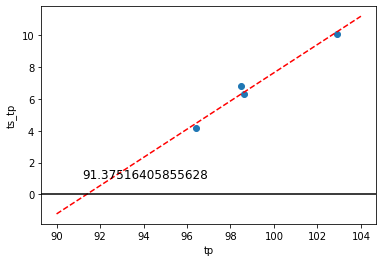

In [12]:
x = np.linspace(90,104)
y = fit[0]*x + fit[1]      # la regressione lineare è una retta con m = fit[0] e q = fit[1]
t_0 = - fit[1]/fit[0]      # per y = 0 otteniamo il nostro x che definisce t_0
plt.plot(x,y, c = 'r', linestyle='dashed', label = fit)
plt.scatter(df.tp,df.ts_tp)
plt.xlabel('tp')
plt.ylabel('ts_tp')
plt.axhline(y=0, color='k', linestyle='-')
plt.text(91.2, 1, t_0, fontsize=12)

Ora stimiamo le distanze dalle varie stazioni e quindi stimiamo la nostra localizzazione partendo dai dati ottenuti dal diagramma di Wadati: 

**Metodo 1: D = Vp * T<sub>p</sub>**. 

In [19]:
t_0= 91.2398413510747
v = 5.500 #velocità carbonati km/s

dNRCA = v*(df.tp[0] - t_0)  #distanze stazione-terremoto in km
dTERO = v*(df.tp[1] - t_0)
dPTQR = v*(df.tp[2] - t_0)
dGUMA = v*(df.tp[3] - t_0)
Dsp = (dNRCA,dTERO,dPTQR,dGUMA)
print(dGUMA)

64.13087256908918


Conoscendo le coordinate delle stazioni in lat e long

In [20]:
lat_NRCA,lon_NRCA = (42.83355,13.11427)
lat_TERO,lon_TERO = (42.62279,13.60393)
lat_PTQR,lon_PTQR = (42.02193,13.40057)
lat_GUMA,lon_GUMA = (43.0627,13.03352)

#creiamo un array con le coordinate lat e lon delle 4 stazioni
lat_sta=np.array([lat_NRCA,lat_TERO,lat_PTQR,lat_GUMA])
lon_sta=np.array([lon_NRCA,lon_TERO,lon_PTQR,lon_GUMA])

Si può pasare da lat e long a coordinate UTM 

In [21]:
#https://it.wikipedia.org/wiki/Proiezione_universale_trasversa_di_Mercatore
import pyproj
utm33 = pyproj.Proj(proj='utm',zone=33, ellps='WGS84', preserve_units=False)

utmx_sta,utmy_sta=utm33(lon_sta,lat_sta)
print(utmx_sta)    #coordinate x delle stazioni in UTM
print(utmy_sta)    #coordinate y delle stazioni in UTM

[345880.86460412 385514.07447036 367582.68452284 339876.35266423]
[4744055.68988415 4719872.25367242 4653448.49926017 4769654.1705878 ]


Hypocentro fornito dalla sala sismica INGV per confornto con la nostra localizzazione

In [22]:
lon_hypo=13.31
lat_hypo=42.42
utmx_hypo,utmy_hypo=utm33(lon_hypo,lat_hypo) #trasforma coordinate hypo in utm

Ora rappresentiamo la distanza della stazioni in pianta e la localizzazione dell'evento fornita dalla sala sismica INGV.

Text(0.5, 0, 'utmX (km)')

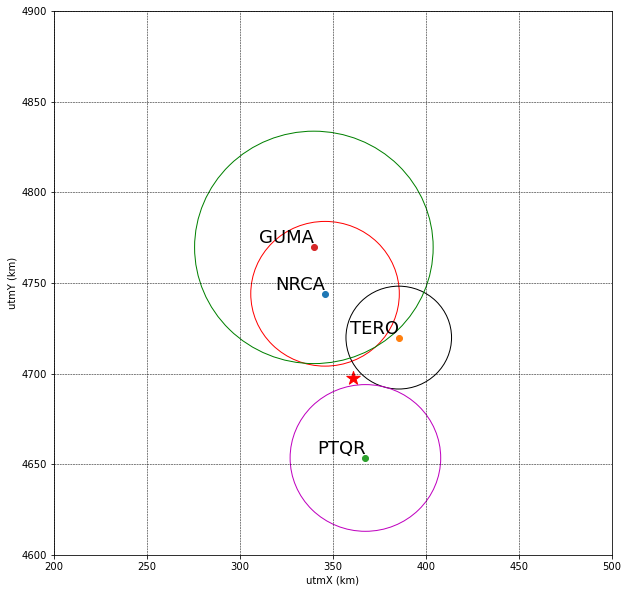

In [23]:
#stazione NRCA ovvero stazione [0]
fig, ax = plt.subplots(figsize=(10,10))
circle0=plt.Circle((utmx_sta[0]/1000,utmy_sta[0]/1000),dNRCA, fill=False)
circle0._set_edgecolor('r')
ax.add_artist(circle0)
ax.scatter(utmx_sta[0]/1000,utmy_sta[0]/1000)
ax.text(utmx_sta[0]/1000,utmy_sta[0]/1000,staz[0],size=18,ha='right', va='bottom')

#stazione TERO ovvero stazione [1]
circle1=plt.Circle((utmx_sta[1]/1000,utmy_sta[1]/1000),dTERO, fill=False)
circle1._set_edgecolor('k')
ax.add_artist(circle1)
ax.scatter(utmx_sta[1]/1000,utmy_sta[1]/1000)
ax.text(utmx_sta[1]/1000,utmy_sta[1]/1000,staz[1],size=18,ha='right', va='bottom')

#stazione PTQR ovvero stazione [2]
circle2=plt.Circle((utmx_sta[2]/1000,utmy_sta[2]/1000),dPTQR, fill=False)
circle2._set_edgecolor('m')
ax.add_artist(circle2)
ax.scatter(utmx_sta[2]/1000,utmy_sta[2]/1000)
ax.text(utmx_sta[2]/1000,utmy_sta[2]/1000,staz[2],size=18,ha='right', va='bottom')

#stazione GUMA ovvero stazione [3]
circle3=plt.Circle((utmx_sta[3]/1000,utmy_sta[3]/1000),dGUMA, fill=False)
circle3._set_edgecolor('g')
ax.add_artist(circle3)
ax.scatter(utmx_sta[3]/1000,utmy_sta[3]/1000)
ax.text(utmx_sta[3]/1000,utmy_sta[3]/1000,staz[3],size=18,ha='right', va='bottom')

#ipocentro da sala sismica INGV
ax.scatter(utmx_hypo/1000,utmy_hypo/1000,s=200, c='r', marker='*')

ax.grid(color='k', linestyle='--', linewidth=0.5)
plt.xlim(200,500)
plt.ylim(4600,4900)
plt.ylabel('utmY (km)')
plt.xlabel('utmX (km)')

<p style='text-align: justify;'>Come si vede la distanza delle stazioni definisce una zona dove potrebbe cadere l'epicentro (area sottesa tra le circonferenze nera, rossa
   e verde), ma allo stesso tempo si osservano delle incertezze nella localizzazione. P.es. l'epicentro calcolato dalla sala sismica INGV, con tecniche più sofisticate, non coincide con l'area di intersezione delle 3 ricronferenze, inoltre la stazione PTQR quasi non interseca alcuna circonferenza. Forse l'approssimazione di v = 5.5 km/s e costante è troppo grande.</p> 

Se non conosciamo il tempo di origine, possiamo localizzare l'evento utilizzando l'equazione sottostante (**Metodo 2**). 

<p style='text-align: justify;'><img src="Fig2.png" alt="Drawing" style="float: right" width="200"><br> Nella relazione di destra, ts - tp (o come lo abbiamo definito noi precedentemente S-P) lo abbiamo già caratterizzato, e per un mezzo Poissoniano abbiamo che Vp/Vs = $\sqrt{3}$. 

Text(0.5, 0, 'utmX (km)')

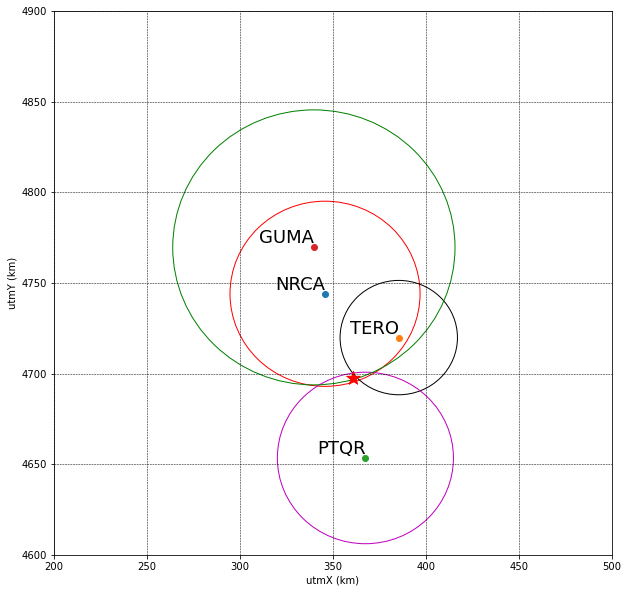

In [24]:
v = 5.500 #velocità carbonati km/s
Dsp_1=v/(np.sqrt(3)-1)*df.ts_tp

#OSS il plot che vado a ricostruire è simile al preccedente MA cambia solo la distanza delle stazioni in quanto 
# stimata con la relazione riportata sopra. Quindi cambia solo Dsp_1.
#stazione NRCA ovvero stazione [0]
fig, ax = plt.subplots(figsize=(10,10))
circle0=plt.Circle((utmx_sta[0]/1000,utmy_sta[0]/1000),Dsp_1[0], fill=False)
circle0._set_edgecolor('r')
ax.add_artist(circle0)
ax.scatter(utmx_sta[0]/1000,utmy_sta[0]/1000)
ax.text(utmx_sta[0]/1000,utmy_sta[0]/1000,staz[0],size=18,ha='right', va='bottom')

#stazione TERO ovvero stazione [1]
circle1=plt.Circle((utmx_sta[1]/1000,utmy_sta[1]/1000),Dsp_1[1], fill=False)
circle1._set_edgecolor('k')
ax.add_artist(circle1)
ax.scatter(utmx_sta[1]/1000,utmy_sta[1]/1000)
ax.text(utmx_sta[1]/1000,utmy_sta[1]/1000,staz[1],size=18,ha='right', va='bottom')

#stazione PTQR ovvero stazione [2]
circle2=plt.Circle((utmx_sta[2]/1000,utmy_sta[2]/1000),Dsp_1[2], fill=False)
circle2._set_edgecolor('m')
ax.add_artist(circle2)
ax.scatter(utmx_sta[2]/1000,utmy_sta[2]/1000)
ax.text(utmx_sta[2]/1000,utmy_sta[2]/1000,staz[2],size=18,ha='right', va='bottom')

#stazione GUMA ovvero stazione [3]
circle3=plt.Circle((utmx_sta[3]/1000,utmy_sta[3]/1000),Dsp_1[3], fill=False)
circle3._set_edgecolor('g')
ax.add_artist(circle3)
ax.scatter(utmx_sta[3]/1000,utmy_sta[3]/1000)
ax.text(utmx_sta[3]/1000,utmy_sta[3]/1000,staz[3],size=18,ha='right', va='bottom')

#ipocentro da sala sismica INGV
ax.scatter(utmx_hypo/1000,utmy_hypo/1000,s=200, c='r', marker='*')

ax.grid(color='k', linestyle='--', linewidth=0.5)
plt.xlim(200,500)
plt.ylim(4600,4900)
plt.ylabel('utmY (km)')
plt.xlabel('utmX (km)')

<p style='text-align: justify;'>In questo caso si nota come la "nostra localizzazione" ben approssima quella della sala sismica. Anche in questo caso vi sono degli errori nella localizzazione che di solito devono essere definiti insieme ai parametri ipocentrali del terremoto. 

# <font color='blue'>Summary </font>

<font color='blue'>
    
Importati sismogrammi delle stazioni e, mediante i tempi di arrivo P ed S, ricostruito il diagramma di Wadati.

Fatta la regressione lineare, fit = linregress(tp, S_P), ed individuato t<sub>0</sub>.</p>

Distanza stazioni ipocentro mediante: Metodo 1) D = Vp * T<sub>p</sub>; Metodo 2) se non si conosce il tempo di origine, assumendo Vp/Vs = $\sqrt{3}$

Prima di calcolare la distanza delle stazioni abbiamo trasformato le coordinate (lon,lat) in km 

    import pyproj
    utm33 = pyproj.Proj(proj='utm',zone=33, ellps='WGS84', preserve_units=False)
